In [34]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Load and display the dataset
df = pd.read_csv("agricultural_waste_data.csv")
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

# Display summary statistics
print("\nSummary statistics of numerical columns:")
df.describe()

Dataset shape: (1000, 8)

First few rows:

Summary statistics of numerical columns:


,crop_area,rainfall,temperature,waste_produced
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,495.353988,102.436144,24.912958,54.940900
std,289.215988,31.412541,4.865889,35.086251
min,14.585703,12.131459,8.802811,1.316282
25%,243.613535,82.412914,21.681938,23.837023
50%,501.839303,103.048261,24.889186,52.224523
75%,746.876392,122.879959,28.341353,79.153190
max,999.720497,197.814732,39.421161,153.548780


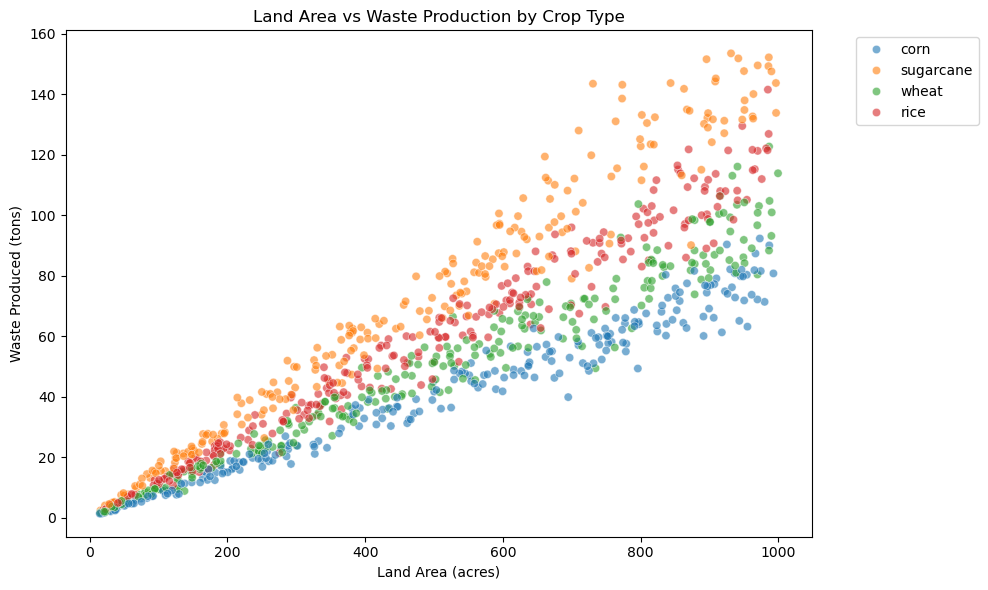


Correlation between land area and waste production: 0.90


In [37]:
# Create a scatter plot of land area vs waste production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='crop_area', y='waste_produced', hue='crop_type', alpha=0.6)
plt.title('Land Area vs Waste Production by Crop Type')
plt.xlabel('Land Area (acres)')
plt.ylabel('Waste Produced (tons)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['crop_area'].corr(df['waste_produced'])
print(f"\nCorrelation between land area and waste production: {correlation:.2f}")

In [38]:
# Perform one-hot encoding for categorical variables
categorical_columns = ['crop_type', 'harvest_season', 'soil_type', 'farming_technique']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = df_encoded.drop('waste_produced', axis=1)
y = df_encoded['waste_produced']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (800, 16)
Testing set shape: (200, 16)


Mean Squared Error: 49.93
R² Score: 0.95


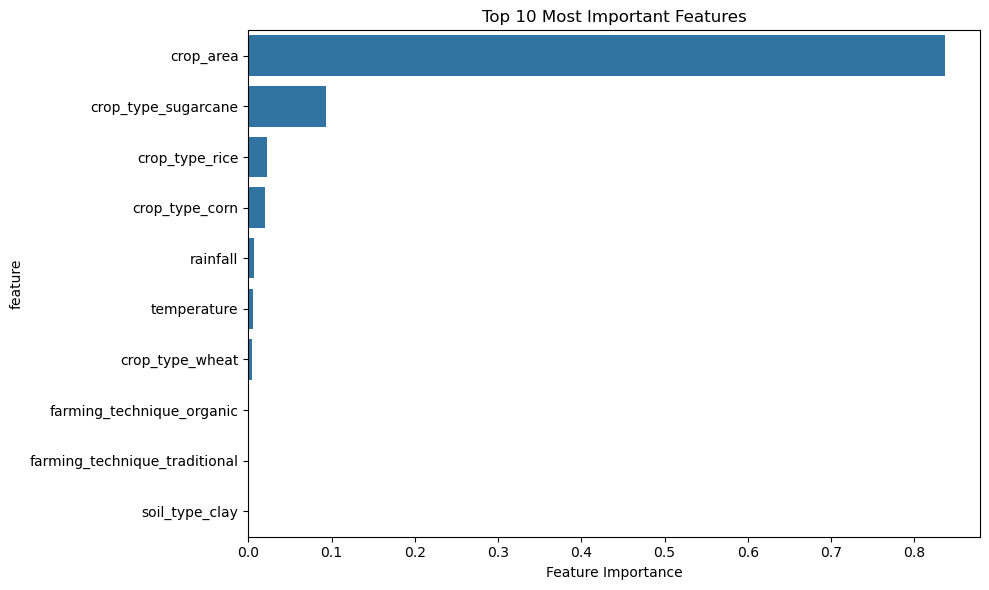

In [39]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [40]:
sample_input = {
    'crop_area': [50],  # Example land area in acres
    'crop_type_rice': [1],
    'harvest_season_summer': [1],
    'soil_type_clay': [1],
    'farming_technique_traditional': [1],
    'temperature': [30],
    'rainfall': [100],
    'humidity': [70]
}

sample_df = pd.DataFrame(sample_input)
sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)

predicted_waste = rf_model.predict(sample_df)

print(f'For a {sample_input["crop_area"][0]} acre farm:')
print(f'Predicted Waste Produced: {predicted_waste[0]:.2f} Tons')

For a 50 acre farm:
Predicted Waste Produced: 5.52 Tons
